In [29]:
#Below are the necessary imports for analyzing datasets and creating visuals.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
import seaborn as sns

In [3]:
#Read CSV
df=pd.read_csv('heart_2020_cleaned.csv') #Heart 2020 Dataset

The data for this project is obtained from Kaggle.com - Personal Key Indicators of Heart Disease https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease.
The data provided here comes from https://www.cdc.gov/brfss/annual_data/annual_2020.html.
The data comes from the CDC, a credible source.
This dataset is a good one to use for our project as it includes many data samples (rows) and categories (columns) to use to compare the results and create predictive models from the results. 

For this dataset, our research question posed was which factor(s) or feature(s) is/are the best predictor(s)/indicator(s) for whether a person is diagnosed with heart disease or not? Based on general knowledge and what we hear usually, our hypothesis is that cholesterol level would be the best predictor for heart disease because it is usually said having high bad cholesterol or low good cholesterol is bad for our health, especially for the condition of our heart, leading to high chances of heart disease.

After we posed the research question and formed the hypothesis, we looked at the data to see if any cleaning is required. All values are good in terms of NaN values are filled, everything is labeled, no overlapping data, etc. However, we are required to manipulate the data because the data has categorical values in addition to numerical values. So we need to create dummy variables for these in order to be able to analyze the data, especially correlations. Otherwise, the correlation plot will skip some of the data or features and only include the numerical data as shown below.

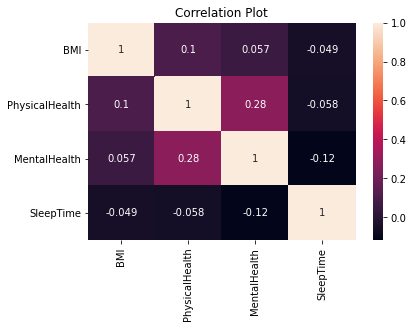

In [4]:
# Dropping duplicates!
df_unique = df.drop_duplicates(subset=['HeartDisease','BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer'], keep='last')
corr = df_unique.corr() 
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot')
plt.show()

As we can see above the correlation matrix is shown to have features that only have numerical data (quantitative data) and not any categorical data. Therefore, features susch as alcohol drinking, smoking, etc. are not included. Even the features inlcuded do not include much insight about the relationship because all the features are very weakly correlated (very small correlation values) and obviously the high value of 1 is present for values that are perfectly correlated to themselves. Moroever, the main target - heart disease - is not even included in the table. So we cannot tell how heart disease is related to the other fetaures. So, we will now include dummy variables to change the categorical values to numerical data values to create a more comprehensive and better correlation matrix.

In [5]:
# Creating dummy variables for all the coulmns using the pd.get_dummies() in Pyhton:
df_dummies = pd.get_dummies(df, columns=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory', 'Race', 'GenHealth'])
df_dummies.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,28.87,6.0,0.0,12.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
6,21.63,15.0,0.0,4.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
7,31.64,5.0,0.0,9.0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
8,26.45,0.0,0.0,5.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9,40.69,0.0,0.0,10.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


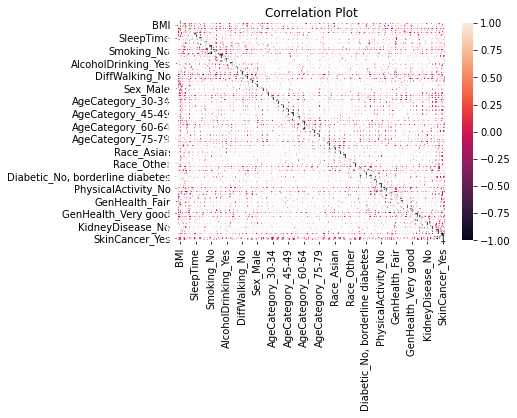

In [7]:
# Dropping duplicates!
#Now we create the correlation plot again using the features from the dataset.
df_dummies_copy = pd.get_dummies(df)
corr = df_dummies_copy.corr() 
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot')
plt.show()

We converted the features from categorical to numerical using dummy variables and values. Using these values we created the correlation matrix. Last time, it was not a good representation of our data because it inlucded only a few features, and excluded a large number of them. But now we can that this correlation plot almost is on the other extreme. This is way too much information in the plot with too many features and too many values, to the point that it is not even clear to see the relationships between the values. It was at this point, that we realized that maybe this dataset was not the ideal one to reveal insights about heart disease, but we tried to go further and see maybe this dataset works well with the linear regression model. 

In [8]:
df_copy = df.copy()
X = df_copy.drop(["HeartDisease"], axis=1) # use all columns except heart disease as features
X = pd.get_dummies(X) # transform categorical columns so we can use them in linear regression
Y = df_copy["HeartDisease"] #HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.14956912334927225
validation score: 0.14707058274654217


As we can see above, the accuracy scores for both the training and validation parts are pretty low, showing the dataset is not very accuarte in predicting heart disease. But we thought that since we inlcuded all the features, the score might have been pretty low as some features might not be related to Heart Disease that well (low correlation) and this might cause the accuracy score to go down when these features are inlcuded in the model. So we decided to see how each feature individually is correlated and accurately predict heart disease to decide which is the best feature.

In [9]:
df_copy = df.copy()
X = df_copy[["AlcoholDrinking"]] # use AlcoholDrinking column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.0010715213533217804
validation score: 0.000796243271373176


In [10]:
df_copy = df.copy()
X = df_copy[["BMI"]] # use BMI column as feature
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.0027924156519789634
validation score: 0.0021883336585981628


In [11]:
df_copy = df.copy()
X = df_copy[["Stroke"]] # use Stroke column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.03800503838210523
validation score: 0.04155783153546999


In [12]:
df_copy = df.copy()
X = df_copy[["PhysicalHealth"]] # use PhysicalHealth column as feature
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.029337742468337424
validation score: 0.028333351428654008


In [13]:
df_copy = df.copy()
X = df_copy[["MentalHealth"]] # use MentalHealth column as feature
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.000741242372337525
validation score: 0.0010388835893275772


In [14]:
df_copy = df.copy()
X = df_copy[["DiffWalking"]] # use DiffWalking column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.040863323819322894
validation score: 0.039041416736328105


In [15]:
df_copy = df.copy()
X = df_copy[["Smoking"]] # use Smoking column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.011630452290075532
validation score: 0.011479994190385479


In [16]:
df_copy = df.copy()
X = df_copy[["Sex"]] # use Sex column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.00519131419031682
validation score: 0.0037094746083111696


In [17]:
df_copy = df.copy()
X = df_copy[["AgeCategory"]] # use AgeCategory column as feature
X = pd.get_dummies(X) # transform categorical column so we can use them in linear regression
Y = df_copy["HeartDisease"]#HeartDisease is the target/goal
Y = pd.get_dummies(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.06019023568646792
validation score: 0.06090332174946195


From the above results, we see that none of the linear regression models were accurate or good in terms of their scores. All the scores are very low (below 0.061), which means that these models are not good predictors of heart disease. This can also been seen in some of the features from the first correlation plot, which shows that all the features are very weakly correlated with one another (very small correlation coefficients). So we decided that this data didn't really provide meaningful insights on which predictor was the best for heart disease (we could have age category because of its highest score values among all the individual features; however, that number itself is extremely small showing not a good relationship or prediction). Moreover, since the columns 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma' 'KidneyDisease' & 'SkinCancer' have only '0' and '1' values, there is no much variation in the data just from visualization. Through data visualization, we were able to realize that our dataset was not adequate to produce a reliable model that would predict the likelihood of having heart disease as there is very little variation in the column values and some of the data values, such as in the age column, are a combination of numbers and words, making them harder to visualize or replace with dummy variables. So we will see if we can improve these accuracy scores and get a better sense of predictor for heart disease by looking at another dataset for heart disease with some similar and some different features. We were able to acquire a new but similar dataset that could help us address our Research question. Our new dataset had 14 columns with all column values as numbers with wider ranges instead of '0's and '1's, therefore increased variation.

In [18]:
#The data for this project is obtained from Kaggle.com - Heart Disease Dataset
#The data provided here comes from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download
#Context for the dataset - This data set is already cleaned and the values are converted from categorical to numerical.

#Read CSV
df2=pd.read_csv('heart.csv') #Titanic Dataset

This dataset is already cleaned (all NaN values were filled, no missing values, or no overlapping vlaues, etc.) and the dataset is already manipulated to be presented in numerical format. Meaning some of the features were categorical, but the usage of dummy variables was done behind the scenes and the dataset is already presented the numerical form for all features.

Now, we decided to do histograms first as a mode of data visualization because we wanted to see how how spread out the each feature's data is in terms of how many data points are in each bar, view the general shape of the feature's graph, view the range of the data.

<function matplotlib.pyplot.show(close=None, block=None)>

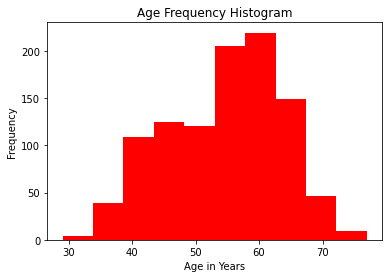

In [62]:
plt.hist(df2['age'], align = 'mid', color = 'red')
# Add a title
plt.title('Age Frequency Histogram')
# Add x and y labels
plt.xlabel('Age in Years')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

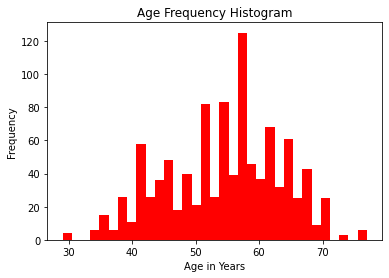

In [63]:
plt.hist(df2['age'], bins = 33, align = 'mid', color = 'red')
# Add a title
plt.title('Age Frequency Histogram')
# Add x and y labels
plt.xlabel('Age in Years')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the age feature is quite spread out with min less than 30 and max above 77. Then we can also see a shape of the distribution of the graph, which is almost like a bell shaped distribution or almost a normal distribution. The peak was at 60, showing the highest numer of data points from that age range. Then for the second graph, everything is the same except the bins. We set the bins to be 33, which is the square root of the number of data points, and this was an attempt to make the graph be a better visual model. However, the higher number of bins divided the graph even more, showing the lower peaks and clusters. However, to get the general idea of the feature, the first graph itself was good.

<function matplotlib.pyplot.show(close=None, block=None)>

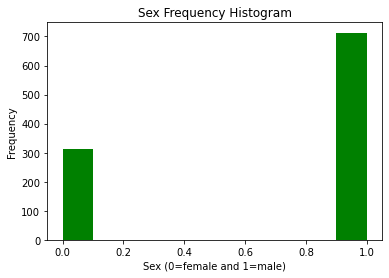

In [64]:
plt.hist(df2['sex'], align = 'mid', color = 'green')
# Add a title
plt.title('Sex Frequency Histogram')
# Add x and y labels
plt.xlabel('Sex (0=female and 1=male)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

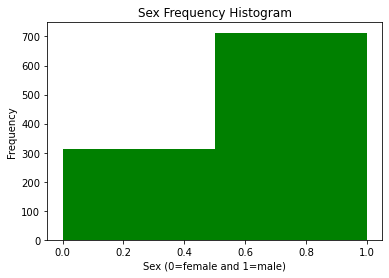

In [65]:
plt.hist(df2['sex'], bins = 2, align = 'mid', color = 'green')
# Add a title
plt.title('Sex Frequency Histogram')
# Add x and y labels
plt.xlabel('Sex (0=female and 1=male)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the sex feature. We can see that there are more males than females, almost twice as many. The data is not quite spread out obviously becasue there are only two values (male=1 and female=1) that the data points can take. We set the bins to be 2 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

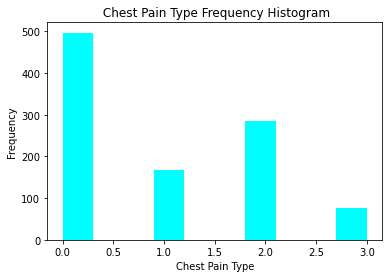

In [75]:
plt.hist(df2['cp'], align = 'mid', color = 'cyan')
# Add a title
plt.title(' Chest Pain Type Frequency Histogram')
# Add x and y labels
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

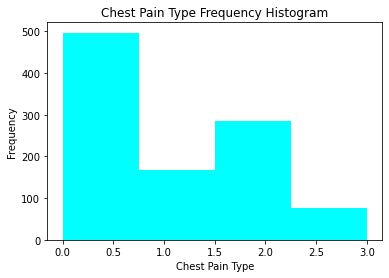

In [76]:
plt.hist(df2['cp'], bins = 4, align = 'mid', color = 'cyan')
# Add a title
plt.title('Chest Pain Type Frequency Histogram')
# Add x and y labels
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the chest pain type feature. We can see that clearly chest paint type 0 is the most dominant one out of all four. The data is not quite spread out obviously becasue there are only four values (0,1,2,3) that the data points can take. We set the bins to be 4 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

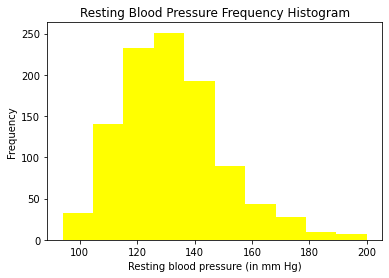

In [77]:
plt.hist(df2['trestbps'], align = 'mid', color = 'yellow')
# Add a title
plt.title('Resting Blood Pressure Frequency Histogram')
# Add x and y labels
plt.xlabel('Resting blood pressure (in mm Hg)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

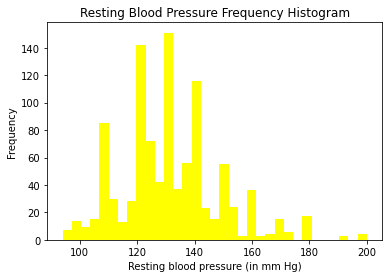

In [78]:
plt.hist(df2['trestbps'], bins = 33, align = 'mid', color = 'yellow')
# Add a title
plt.title('Resting Blood Pressure Frequency Histogram')
# Add x and y labels
plt.xlabel('Resting blood pressure (in mm Hg)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the resting blood pressure feature is quite spread out with min less than 100 and max close to 200. Then we can also see a shape of the distribution of the graph, which is slightly right-skewed with some outliers in the higher resting blood pressure numbers. The peak was at 130, showing the highest numer of data points from that resting blood pressure range. Then for the second graph, everything is the same except the bins. We set the bins to be 33, which is the square root of the number of data points, and this was an attempt to make the graph be a better visual model. However, the higher number of bins divided the graph even more, showing the lower peaks and clusters. However, to get the general idea of the feature, the first graph itself was good.

<function matplotlib.pyplot.show(close=None, block=None)>

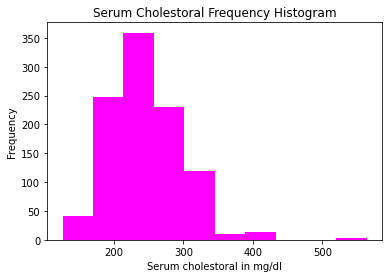

In [79]:
plt.hist(df2['chol'], align = 'mid', color = 'magenta')
# Add a title
plt.title('Serum Cholestoral Frequency Histogram')
# Add x and y labels
plt.xlabel('Serum cholestoral in mg/dl')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

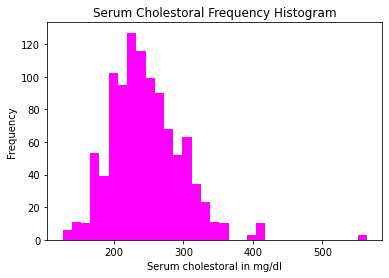

In [80]:
plt.hist(df2['chol'], bins = 33, align = 'mid', color = 'magenta')
# Add a title
plt.title('Serum Cholestoral Frequency Histogram')
# Add x and y labels
plt.xlabel('Serum cholestoral in mg/dl')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the serum cholesterol feature is quite spread out with min less than 200 and max over 500. Then we can also see a shape of the distribution of the graph, which is slightly right-skewed with some outliers in the higher serum cholesterol numbers. The peak was between 200 and 300, showing the highest numer of data points from that resting blood pressure range. Then for the second graph, everything is the same except the bins. We set the bins to be 33, which is the square root of the number of data points, and this was an attempt to make the graph be a better visual model. However, the higher number of bins divided the graph even more, showing the lower peaks and clusters. However, to get the general idea of the feature, the first graph itself was good.

<function matplotlib.pyplot.show(close=None, block=None)>

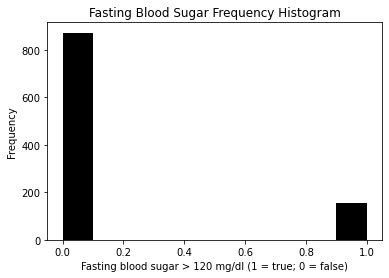

In [83]:
plt.hist(df2['fbs'], align = 'mid', color = 'black')
# Add a title
plt.title('Fasting Blood Sugar Frequency Histogram')
# Add x and y labels
plt.xlabel('Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

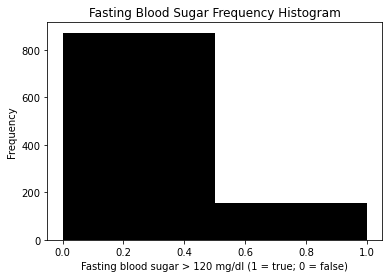

In [84]:
plt.hist(df2['fbs'], bins = 2, align = 'mid', color = 'black')
# Add a title
plt.title('Fasting Blood Sugar Frequency Histogram')
# Add x and y labels
plt.xlabel('Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the fasting bool sugar feature. We can see that there are more people (almost four times as many) with fasting blood sugar less than or equal to 120 than people with fasting blood sugar greater than 120. The data is not quite spread out obviously becasue there are only two values (true=1 and false=0) that the data points can take. We set the bins to be 2 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

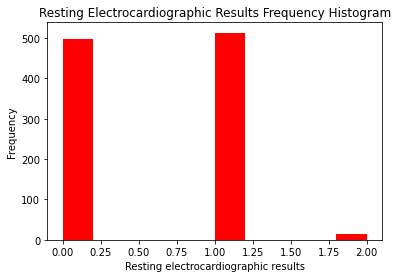

In [101]:
plt.hist(df2['restecg'], align = 'mid', color = 'red')
# Add a title
plt.title('Resting Electrocardiographic Results Frequency Histogram')
# Add x and y labels
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

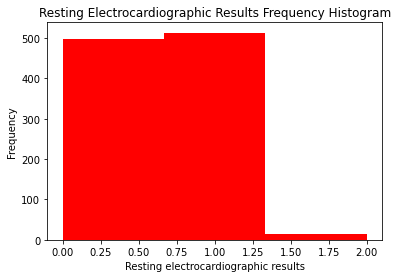

In [100]:
plt.hist(df2['restecg'], bins = 3, align = 'mid', color = 'red')
# Add a title
plt.title('Resting Electrocardiographic Results Frequency Histogram')
# Add x and y labels
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the resting electrocardiographic results feature. We can see that most of the people have values of 0 or 1, and only some have a value of 2. The data is not quite spread out obviously becasue there are only three values (0,1,2) that the data points can take. We set the bins to be 3 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

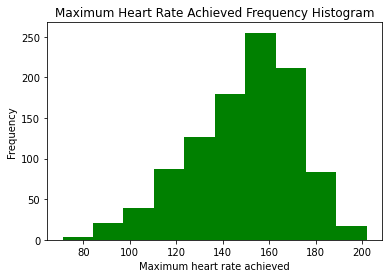

In [99]:
plt.hist(df2['thalach'], align = 'mid', color = 'green')
# Add a title
plt.title('Maximum Heart Rate Achieved Frequency Histogram')
# Add x and y labels
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

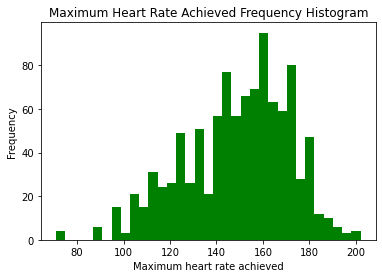

In [98]:
plt.hist(df2['thalach'], bins = 33, align = 'mid', color = 'green')
# Add a title
plt.title('Maximum Heart Rate Achieved Frequency Histogram')
# Add x and y labels
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the maximum heart rate achieved feature is quite spread out with min less than 80 and max close to 200. Then we can also see a shape of the distribution of the graph, which is slightly left-skewed with some outliers in the lower heart rate numbers. The peak was close to 160, showing the highest numer of data points from that maximum heart rate achieved range. Then for the second graph, everything is the same except the bins. We set the bins to be 33, which is the square root of the number of data points, and this was an attempt to make the graph be a better visual model. However, the higher number of bins divided the graph even more, showing the lower peaks and clusters. However, to get the general idea of the feature, the first graph itself was good.

<function matplotlib.pyplot.show(close=None, block=None)>

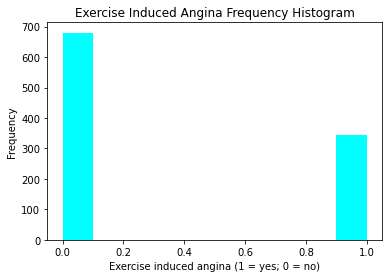

In [97]:
plt.hist(df2['exang'], align = 'mid', color = 'cyan')
# Add a title
plt.title('Exercise Induced Angina Frequency Histogram')
# Add x and y labels
plt.xlabel('Exercise induced angina (1 = yes; 0 = no)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

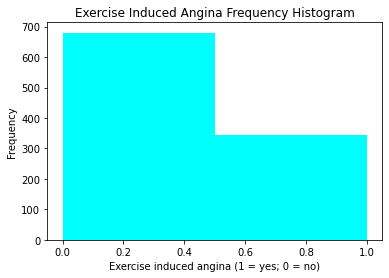

In [96]:
plt.hist(df2['exang'], bins = 2, align = 'mid', color = 'cyan')
# Add a title
plt.title('Exercise Induced Angina Frequency Histogram')
# Add x and y labels
plt.xlabel('Exercise induced angina (1 = yes; 0 = no)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the exercise induced angina feature. We can see that there are more points for 0 than 1, almost twice as many. The data is not quite spread out obviously becasue there are only two values (0,1) that the data points can take. We set the bins to be 2 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

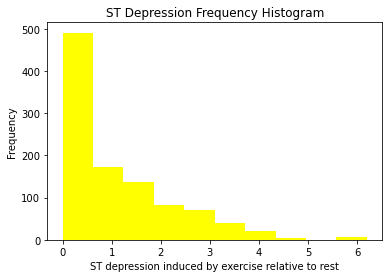

In [102]:
plt.hist(df2['oldpeak'], align = 'mid', color = 'yellow')
# Add a title
plt.title('ST Depression Frequency Histogram')
# Add x and y labels
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

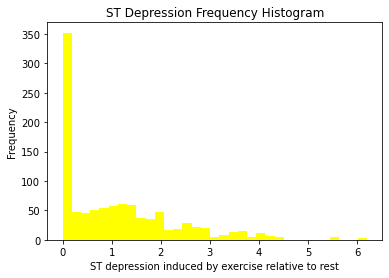

In [103]:
plt.hist(df2['oldpeak'], bins = 33, align = 'mid', color = 'yellow')
# Add a title
plt.title('ST Depression Frequency Histogram')
# Add x and y labels
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows that the data for the ST depression feature is somewhat spread out with smallest value being 0 and largest value being greater than 6. Then we can also see a shape of the distribution of the graph, which is clearly right-skewed with some outliers in the lower heart rate numbers. The peak was at 0, showing the highest numer of data points from that ST depression range. Then for the second graph, everything is the same except the bins. We set the bins to be 33, which is the square root of the number of data points, and this was an attempt to make the graph be a better visual model. However, the higher number of bins divided the graph even more, showing the lower peaks and clusters. However, to get the general idea of the feature, the first graph itself was good.

<function matplotlib.pyplot.show(close=None, block=None)>

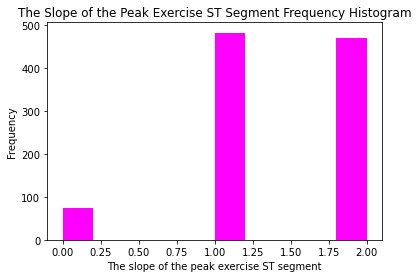

In [104]:
plt.hist(df2['slope'], align = 'mid', color = 'magenta')
# Add a title
plt.title('The Slope of the Peak Exercise ST Segment Frequency Histogram')
# Add x and y labels
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

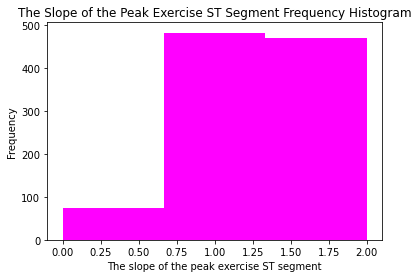

In [105]:
plt.hist(df2['slope'], bins = 3, align = 'mid', color = 'magenta')
# Add a title
plt.title('The Slope of the Peak Exercise ST Segment Frequency Histogram')
# Add x and y labels
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms show the data for the slope of the peak excersite ST segement feature. We can see that most of the data points have values of 1 or 2, and only some have a value of 0. The data is not quite spread out obviously becasue there are only three values (0,1,2) that the data points can take. We set the bins to be 3 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

<function matplotlib.pyplot.show(close=None, block=None)>

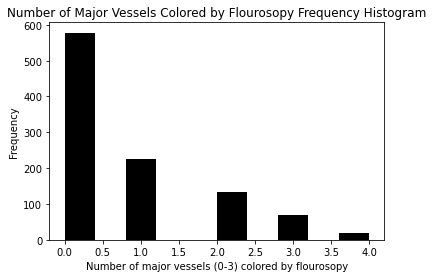

In [106]:
plt.hist(df2['ca'], align = 'mid', color = 'black')
# Add a title
plt.title('Number of Major Vessels Colored by Flourosopy Frequency Histogram')
# Add x and y labels
plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

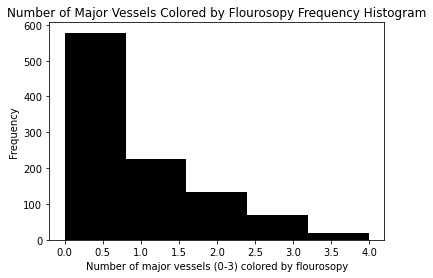

In [107]:
plt.hist(df2['ca'], bins = 5, align = 'mid', color = 'black')
# Add a title
plt.title('Number of Major Vessels Colored by Flourosopy Frequency Histogram')
# Add x and y labels
plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms show the number of major vessels colored by flouroscopy. We can see that most data points fall in the number of vessels colored is 0. The data is not quite spread out obviously becasue there are only four values (0,1,2,3,4) that the data points can take. We set the bins to be 5 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same. We noticed that the vlaues were only supposed to be between 0-3 but we got a value that was 4 in the dataset, which leads us to think that were some minor inaccuracies in the dataset to start with.

<function matplotlib.pyplot.show(close=None, block=None)>

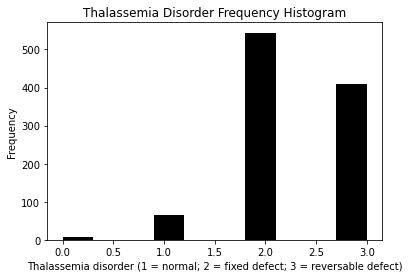

In [110]:
plt.hist(df2['thal'], align = 'mid', color = 'black')
# Add a title
plt.title('Thalassemia Disorder Frequency Histogram')
# Add x and y labels
plt.xlabel('Thalassemia disorder (1 = normal; 2 = fixed defect; 3 = reversable defect)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

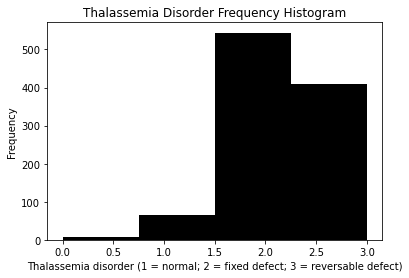

In [111]:
plt.hist(df2['thal'], bins = 4, align = 'mid', color = 'black')
# Add a title
plt.title('Thalassemia Disorder Frequency Histogram')
# Add x and y labels
plt.xlabel('Thalassemia disorder (1 = normal; 2 = fixed defect; 3 = reversable defect)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows the thalassemia disorder feature. We can see that most data points fall in the range of 2. The data is not quite spread out obviously becasue there are only four values (0,1,2,3) that the data points can take. We set the bins to be 4 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same. We noticed that the vlaues were only supposed to be between 1-3 but we got a value that was 0 in the dataset, which leads us to think that were some minor inaccuracies in the dataset to start with.

<function matplotlib.pyplot.show(close=None, block=None)>

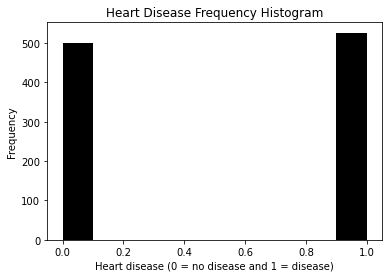

In [108]:
plt.hist(df2['target'], align = 'mid', color = 'black')
# Add a title
plt.title('Heart Disease Frequency Histogram')
# Add x and y labels
plt.xlabel('Heart disease (0 = no disease and 1 = disease)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

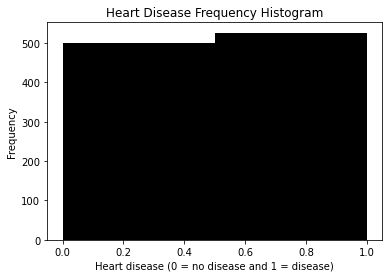

In [109]:
plt.hist(df2['target'], bins = 2, align = 'mid', color = 'black')
# Add a title
plt.title('Heart Disease Frequency Histogram')
# Add x and y labels
plt.xlabel('Heart disease (0 = no disease and 1 = disease)')
plt.ylabel('Frequency')

# Show the plot!
plt.show

The two histograms shows our target - heart disease. We can see that data points are roughly split between 0 and 1 (0 means no disease and 1 means heart disease is present) showing that they was equal and fair representation for both categories of people. The data is not quite spread out obviously becasue there are only two values (0 or 1) that the data points can take. We set the bins to be 2 because of the previous statement, and the second graph is more compact and condeses everything into this graph but maintains all the details eaxctly the same.

As we can see the histograms show that there is quite some variation in our data, which is good. In addition, we can see that there are over 1000 datapoints, and 14 features, and target value (heart disease) which makes it a good data set with a lot of data to analyze. So now, we move onto the correlation plot to show how each feature is the related to others, and which feature(s) is the most correlated with heart disease.

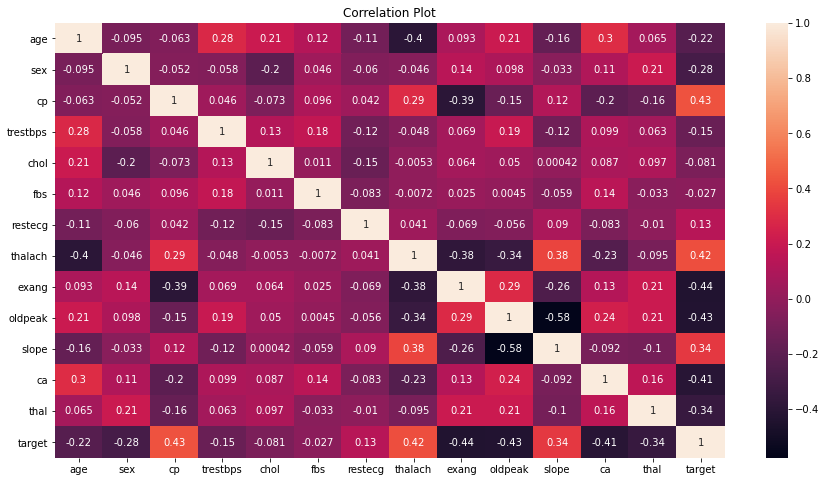

In [41]:
# Dropping duplicates!
df2_unique = df2.drop_duplicates(subset=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'], keep='last')
corr = df2_unique.corr() 
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot')
plt.show()

We can see that this correlation plot is much better than the one we had previously (we can read the data as it is not too much or too little) giving us some insights into the dataset. We are mainly focused on which feature is the most closely related to heart disease as this will lead us to find the best predictor for heart disease. So from the correlation plot we have features that are moderately correlated with heart disease such as exang and cp (correlation values are greater than 0.40 in absolute value) and features that are weakly correlated with heart disease such as chol and fbs (very small correlation coefficients). Using these features, we would like to do a linear regression and a kNN classifier model analysis to see which feature(s) are the best predictors of heart disease.

In [23]:
df2_copy = df2.copy()
X = df2_copy.drop(["target"], axis=1) # use all columns except heart disease
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.5362957937325112
validation score: 0.409608010607855


We can see that this is not a bad model score, definitely much better than the original dataset's values. However, the accuracy value is still not very high. So, maybe we can try to choose different features based on their correlation values and get a better accuracy. So first we chose the features with the highest correlation values with heart disease and performed a linear regression on each individually. Then, we chose different combinations of these features to do linear regression on.

In [19]:
df2_copy = df2.copy()
X = df2_copy[["cp"]] # use cp column
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.18700894322603412
validation score: 0.19675751587181056


In [20]:
df2_copy = df2.copy()
X = df2_copy[["thalach"]] # use thalach column
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.191905667434909
validation score: 0.12476989679722428


In [27]:
df2_copy = df2.copy()
X = df2_copy[["exang"]] # use all columns except heart disease
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.1814478805360209
validation score: 0.23112170986124458


In [21]:
df2_copy = df2.copy()
X = df2_copy[["oldpeak"]] # use oldpeak column
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.20273123280611072
validation score: 0.14639180281159125


In [22]:
df2_copy = df2.copy()
X = df2_copy[["ca"]] # use ca column
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.1563069704779082
validation score: 0.10354696116076445


In [48]:
df2_copy = df2.copy()
X = df2_copy[["cp", "thalach", "exang", "oldpeak", "ca"]] # use all of the above features (5 of them)
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set


print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?


training score: 0.45723676523961154
validation score: 0.3650844600202736


In [24]:
df2_copy = df2.copy()
X = df2_copy[["cp", "exang", "oldpeak"]] # use only three of those five features
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.37263113940706816
validation score: 0.3194291690087808


In [25]:
df2_copy = df2.copy()
X = df2_copy[["cp", "thalach", "exang", "oldpeak", "ca", "slope", "thal"]] # use more features
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.5012742431097985
validation score: 0.3576651540109529


In [26]:
df2_copy = df2.copy()
X = df2_copy[["cp", "thalach", "exang", "oldpeak", "ca", "slope", "thal", "age", "sex"]] # use even more features
Y = df2_copy["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.5264349427099069
validation score: 0.41071802373032884


In [27]:
df2_copy = df2.copy()
X = df2_copy[["cp", "thalach", "exang", "oldpeak", "ca", "slope", "thal", "age", "sex", "trestbps", "restecg"]] # use all features except the weakly correlated ones with heart disease (chol and fbs)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.5317941577932768
validation score: 0.4226500495991189


So from above we can see that the best accuracy score we got out of the different improvement efforts was the one where we used all the features to predict heart disease except the ones (especially two) that were very weakly correlated with heart disease (chol and fbs both had correlation coefficients lower than 0.1 in absolute value). This made sense because removing these will improve the correlation and give us a better linear regression model. However, even this was not super accurate with the scores. So now, we move onto kNN classifier method and see how that compares with the linear regression model.

USING A KNN CLASSIFIER

Classifiers would be better than Linear regression as regression is used to predict continuous variable while Classifiers are used to predict categorical or binary variables.

Since Heart Disease is stored as binary variables with 0 (No Heart Disease) and 1 (Heart Disease), Classifiers are more likely to produce a better model.

In [32]:
#Creating a model with all data columns (helps us choose the right k value)
#separate your X (features) and your Y (target).
X = df2.drop(['target'], axis=1) 
Y = df2['target']

#train test split the data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

#Classifying and fitting model with different k values
model1 = KNeighborsClassifier(10) #k = 10
model1.fit(x_train, y_train)

model2 = KNeighborsClassifier(35) #k = 35
model2.fit(x_train, y_train)

model3 = KNeighborsClassifier(70) #k = 70
model3.fit(x_train, y_train)

#store the predictions for the test sets
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

accuracy1 = accuracy_score(prediction1, y_test) #accuracy for k = 1
accuracy2 = accuracy_score(prediction2, y_test) #accuracy for k = 2
accuracy3 = accuracy_score(prediction3, y_test) #accuracy for k = 3

print('accuracy with k=1: ', accuracy1)
print('accuracy with k=2: ', accuracy2)
print('accuracy with k=3: ', accuracy3)

accuracy with k=1:  0.7170731707317073
accuracy with k=2:  0.6585365853658537
accuracy with k=3:  0.5853658536585366


'k = 10' produces more accurate results for this data set

In [33]:
#Creating a model with the 'age' data
X = df2[['age']]  
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.6195121951219512


In [34]:
#Creating a model with 'sex' (Female/Male) data 
X = df2[['sex']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.4975609756097561


In [35]:
#Creating a model with 'chest pain type' data (values:0-3)
X = df2[['cp']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.751219512195122


In [36]:
#Creating a model with 'resting blood pressure (in mm Hg on admission to the hospital)'
X = df2[['trestbps']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.5463414634146342


In [37]:
#Creating a model with 'serum cholestrol in mg/dl'
X = df2[['chol']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.6926829268292682


In [38]:
#Creating a model with (fasting blood sugar &gt; 120 mg/dl)(1=true; 0=false)
X = df2[['fbs']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)


accuracy:  0.5073170731707317


In [39]:
#Creating a model with 'resting electrocardiographic results' (values:0-1)
X = df2[['restecg']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.6097560975609756


In [40]:
#Creating a model with 'maximum heart rate achieved' (values: 71-202)
X = df2[['thalach']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.6536585365853659


In [41]:
#Creating a model with 'exercised induced angina' data values (1=yes;0=no)
X = df2[['exang']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.7268292682926829


In [42]:
#Creating a model with 'ST depression induced by exercise relative to rest' values: 0-6.2
X = df2[['oldpeak']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.7219512195121951


In [43]:
#Creating a model with 'the slope peak exercise ST segment' data values
X = df2[['slope']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.4975609756097561


In [44]:
#Creating a model with 'number of major vessels (0-3) colored by flourosopy'
X = df2[['ca']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.7170731707317073


In [45]:
#Creating a model with (1=normal; 2=fixed defect; 3=reversable defect)
X = df2[['thal']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.4975609756097561


From all models created we pick the features that produced the highest accuracy (ideally accuracy > 0.7)

Best Features: 'chest pain type', 'exercised induced angina', 'ST depression induced by exercise relative to rest', 'number of major vessels (0-3) colored by flourosopy'. We can see these features were also included as the better ones in the linear regression model. However, the kNN classifier model gave us limited number of features to be good predictors, which is better and more accuarate, than actually inlcuding more of the features as it will be shown by the accuracy value next.

In [46]:
#Creating the final model using KNN Classifiers
X = df2[['cp', 'exang', 'oldpeak', 'ca']] 
Y = df2['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

model = KNeighborsClassifier(10) #k = 10
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('accuracy: ', accuracy)

accuracy:  0.8048780487804879


The accuracy of the final model, which uses the four chosen features, is higher compared to the accuracy of model1 that uses all features of the data set. Moreover, we saw that this accuracy value is much higher than the the scores we got for the best linear regression model. So, we can say the kNN classifer model worked better for our dataset, providing us with the four features that are the best predictors for heart disease ('chest pain type', 'exercised induced angina', 'ST depression induced by exercise relative to rest', 'number of major vessels (0-3) colored by flourosopy' from the dataset). This is because once again as stated earlier, Classifiers would be better than Linear regression as regression is used to predict continuous variable while Classifiers are used to predict categorical or binary variables. Since Heart Disease is stored as binary variables with 0 (No Heart Disease) and 1 (Heart Disease), Classifiers are more likely to produce a better model and this was what happened in our analysis. Our hypothesis, and general view, that cholesterol is the best predictor of heart disease was shown not to be true all the time based on this dataset because the correlation value for heart disease and cholesterol was lower than 0.1 in absolute value showing very weak correlation but the classier accuracy score for cholesterol was high, but not as high as compared to the four best features given above. We chose those 4 as the best ones because they had the highest accuracy values, and were greater than 0.70, while all the others were less than 0.7. So we thought 0.7 was the cutoff here as it gave us sufficient number of features to get a higher or even better accuracy score (slightly above 0.80 which is pretty good) for the classifier model than the original one by using these four features. So, we can possibly get different (maybe even better results) if we look at a better dataset (meaning more data points, features, etc.) in the future to compare with more variation in the data and representation of the population.

In [ ]:
THE END!!!! THANK YOU!
-KRISHNA PALEMPALLI AND JANETH MANYALLA